In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)
import seaborn as sns
from pesummary.core.plots.bounded_1d_kde import bounded_1d_kde

In [2]:
from pycbc.inference import io,models

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


# An example of PDF

In [3]:
f = io.loadfile('/work/cdcapano/projects/gated_gaussian/gw190521/reruns/set1/220_330/samples-06.hdf','r')

In [4]:
pos = f.read_samples(['amp330'])

<AxesSubplot:ylabel='Density'>

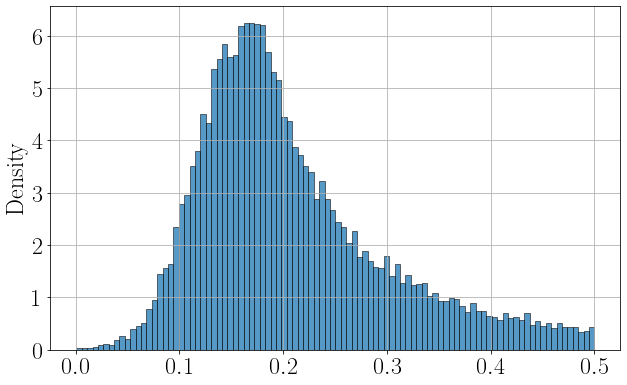

In [5]:
sns.histplot(pos['amp330'],stat='density')

In [6]:
pdf = bounded_1d_kde(pos['amp330'], xlow=0, xhigh=0.5, method="Reflection")

In [7]:
pdf(0)

array([0.03162803])

Text(0.5, 0, 'A330')

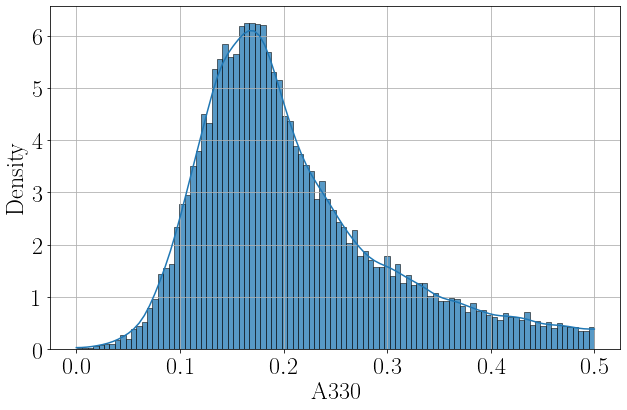

In [8]:
sns.histplot(pos['amp330'],stat='density')
x = np.linspace(0,0.5,100)
plt.plot(x,pdf(x))
plt.xlabel('A330')

# Savage Dickey Density Ratio

In [9]:
def savage_dickey(hdfpath,par='amp330',prior_low=0,prior_high=0.5):
    '''
    Compute the Bayes Factor given a hdf file's path 
    '''
    f = io.loadfile(hdfpath,'r')
    pos = f.read_samples([par])
    pdf = bounded_1d_kde(pos[par], xlow=prior_low, xhigh=prior_high, method="Reflection") #PDF
    prior = 1/ (prior_high-prior_low) #uniform distribution
    f.close()
    return prior/pdf(0) #BF = prior(0) / posterior(0)

def dynesty_logbf(hdfpath):
    f = io.loadfile(hdfpath,'r')
    return f.attrs['log_evidence']

# 6 MS

In [10]:
savage_bf = []
dynesty_bf = []

for i in range(1,10+1):
    path330 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/set'+str(i)+'/220_330/samples-06.hdf'
    path221 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/set'+str(i)+'/220_221/samples-06.hdf'
    path220 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/set'+str(i)+'/220/samples-06.hdf'
    
    # Savage Dickey
    bf330 = savage_dickey(path330,par='amp330',prior_low=0,prior_high=0.5)
    bf221 = savage_dickey(path221,par='amp221',prior_low=0,prior_high=5)
    
    # Dynesty log BF
    dy330 = dynesty_logbf(path330)
    dy221 = dynesty_logbf(path221)
    dy220 = dynesty_logbf(path220)
    
    dybf = np.exp(dy330 - max(dy221,dy220))
    print('set',i,'BF with savage dickey is:',bf330/max(1,bf221),';Dynesty Bayes Factor is:',dybf)
    savage_bf.append(bf330/max(1,bf221))
    dynesty_bf.append(dybf)

set 1 BF with savage dickey is: [67.30490298] ;Dynesty Bayes Factor is: 54.26112487947026
set 2 BF with savage dickey is: [47.37355329] ;Dynesty Bayes Factor is: 50.55199617114795
set 3 BF with savage dickey is: [74.87880615] ;Dynesty Bayes Factor is: 63.1085875789332
set 4 BF with savage dickey is: [53.06570184] ;Dynesty Bayes Factor is: 54.31688115434423
set 5 BF with savage dickey is: [46.05114888] ;Dynesty Bayes Factor is: 59.73667327250735
set 6 BF with savage dickey is: [75.8684888] ;Dynesty Bayes Factor is: 52.7514284502041
set 7 BF with savage dickey is: [63.50408978] ;Dynesty Bayes Factor is: 61.09778066876793
set 8 BF with savage dickey is: [49.4910095] ;Dynesty Bayes Factor is: 59.2261944607824
set 9 BF with savage dickey is: [57.55446819] ;Dynesty Bayes Factor is: 55.269381285828736
set 10 BF with savage dickey is: [59.61711074] ;Dynesty Bayes Factor is: 56.19351647777583


# More live, 6 ms

In [11]:
path330 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/more_livepoints/220_330/samples-06.hdf'
path221 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/more_livepoints/220_221/samples-06.hdf'
path220 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/more_livepoints/220/samples-06.hdf'

#savage dickey
bf330 = savage_dickey(path330,par='amp330',prior_low=0,prior_high=0.5)
bf221 = savage_dickey(path221,par='amp221',prior_low=0,prior_high=5)

#dynesty
dy330 = dynesty_logbf(path330)
dy221 = dynesty_logbf(path221)
dy220 = dynesty_logbf(path220)
    
dybf = np.exp(dy330 - max(dy221,dy220))
print('set',i,'BF with savage dickey is:',bf330/max(1,bf221),';Dynesty Bayes Factor is:',dybf)

set 10 BF with savage dickey is: [53.54845025] ;Dynesty Bayes Factor is: 55.040374070835256


In [12]:
savage_bf.append(bf330/max(1,bf221))
dynesty_bf.append(dybf)

In [13]:
savage_bf

[array([67.30490298]),
 array([47.37355329]),
 array([74.87880615]),
 array([53.06570184]),
 array([46.05114888]),
 array([75.8684888]),
 array([63.50408978]),
 array([49.4910095]),
 array([57.55446819]),
 array([59.61711074]),
 array([53.54845025])]

In [14]:
dynesty_bf

[54.26112487947026,
 50.55199617114795,
 63.1085875789332,
 54.31688115434423,
 59.73667327250735,
 52.7514284502041,
 61.09778066876793,
 59.2261944607824,
 55.269381285828736,
 56.19351647777583,
 55.040374070835256]

In [15]:
np.mean(savage_bf),np.std(savage_bf)

(58.932520945301114, 9.938740252805646)

In [16]:
np.mean(dynesty_bf),np.std(dynesty_bf)

(56.50490349732702, 3.6390422419299964)

# 6MS run: mean: 56.5, standard variance: 3.6

# 7 MS

In [17]:
savage_bf = []
dynesty_bf = []

for i in range(1,10+1):
    path330 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/set'+str(i)+'/220_330/samples-07.hdf'
    path221 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/set'+str(i)+'/220_221/samples-07.hdf'
    path220 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/set'+str(i)+'/220/samples-07.hdf'
    
    # Savage Dickey
    bf330 = savage_dickey(path330,par='amp330',prior_low=0,prior_high=0.5)
    bf221 = savage_dickey(path221,par='amp221',prior_low=0,prior_high=5)
    
    # Dynesty log BF
    dy330 = dynesty_logbf(path330)
    dy221 = dynesty_logbf(path221)
    dy220 = dynesty_logbf(path220)
    
    dybf = np.exp(dy330 - max(dy221,dy220))
    print('set',i,'BF with savage dickey is:',bf330/max(1,bf221),';Dynesty Bayes Factor is:',dybf)
    savage_bf.append(bf330/max(1,bf221))
    dynesty_bf.append(dybf)

set 1 BF with savage dickey is: [48.94902309] ;Dynesty Bayes Factor is: 44.30472512718218
set 2 BF with savage dickey is: [42.77424158] ;Dynesty Bayes Factor is: 47.29367166986813
set 3 BF with savage dickey is: [45.10084427] ;Dynesty Bayes Factor is: 46.76920932282837
set 4 BF with savage dickey is: [40.92624146] ;Dynesty Bayes Factor is: 43.59395873929914
set 5 BF with savage dickey is: [37.91964742] ;Dynesty Bayes Factor is: 41.50721193305972
set 6 BF with savage dickey is: [53.40630684] ;Dynesty Bayes Factor is: 43.34798853128121
set 7 BF with savage dickey is: [49.9372155] ;Dynesty Bayes Factor is: 49.92788463237867
set 8 BF with savage dickey is: [38.50156789] ;Dynesty Bayes Factor is: 42.078129153255375
set 9 BF with savage dickey is: [43.50517703] ;Dynesty Bayes Factor is: 50.80730540774852
set 10 BF with savage dickey is: [42.21215323] ;Dynesty Bayes Factor is: 44.21221581366526


# More nlive 7 ms

In [18]:
path330 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/more_livepoints/220_330/samples-07.hdf'
path221 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/more_livepoints/220_221/samples-07.hdf'
path220 = '/work/cdcapano/projects/gated_gaussian/gw190521/reruns/more_livepoints/220/samples-07.hdf'

#savage dickey
bf330 = savage_dickey(path330,par='amp330',prior_low=0,prior_high=0.5)
bf221 = savage_dickey(path221,par='amp221',prior_low=0,prior_high=5)

#dynesty
dy330 = dynesty_logbf(path330)
dy221 = dynesty_logbf(path221)
dy220 = dynesty_logbf(path220)
    
dybf = np.exp(dy330 - max(dy221,dy220))
print('set',i,'BF with savage dickey is:',bf330/max(1,bf221),';Dynesty Bayes Factor is:',dybf)

set 10 BF with savage dickey is: [44.57282585] ;Dynesty Bayes Factor is: 48.549084910046695


In [19]:
savage_bf.append(bf330/max(1,bf221))
dynesty_bf.append(dybf)

In [20]:
savage_bf

[array([48.94902309]),
 array([42.77424158]),
 array([45.10084427]),
 array([40.92624146]),
 array([37.91964742]),
 array([53.40630684]),
 array([49.9372155]),
 array([38.50156789]),
 array([43.50517703]),
 array([42.21215323]),
 array([44.57282585])]

In [21]:
dynesty_bf

[44.30472512718218,
 47.29367166986813,
 46.76920932282837,
 43.59395873929914,
 41.50721193305972,
 43.34798853128121,
 49.92788463237867,
 42.078129153255375,
 50.80730540774852,
 44.21221581366526,
 48.549084910046695]

In [22]:
np.mean(savage_bf),np.std(savage_bf)

(44.34593128803124, 4.573051146013939)

In [23]:
np.mean(dynesty_bf),np.std(dynesty_bf)

(45.671944112783024, 3.0237887586334233)

# 7MS run: mean: 45.7; standard variance: 3.0

In [24]:
bf330 = savage_dickey('newruns/condor8-prior0p9-330/result.hdf',par='amp330',prior_low=0,prior_high=0.9)

In [25]:
bf330

array([22.17257749])